### EDA of Airbnb Host compared to Super Host Title

#### Name: Muley, Tushar



In [1]:
#Import Everthing I think I need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot

In [2]:
#Import my file, decompress, load to dataframe
dfAirbnb = pd.read_csv('listings_la_ca_october_2020.csv.gz', compression='gzip',
                   error_bad_lines=False)
print(dfAirbnb)

             id                            listing_url       scrape_id  \
0           109       https://www.airbnb.com/rooms/109  20200909145537   
1           344       https://www.airbnb.com/rooms/344  20200909145537   
2          2708      https://www.airbnb.com/rooms/2708  20200909145537   
3          2732      https://www.airbnb.com/rooms/2732  20200909145537   
4          2864      https://www.airbnb.com/rooms/2864  20200909145537   
...         ...                                    ...             ...   
31531  45355046  https://www.airbnb.com/rooms/45355046  20200909145537   
31532  45355121  https://www.airbnb.com/rooms/45355121  20200909145537   
31533  45355360  https://www.airbnb.com/rooms/45355360  20200909145537   
31534  45355859  https://www.airbnb.com/rooms/45355859  20200909145537   
31535  45356212  https://www.airbnb.com/rooms/45356212  20200909145537   

      last_scraped                                               name  \
0       2020-09-11  Amazing bright ele

In [3]:
dfAirbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [3]:
#Take on the columns I needed for the analysis and all it 'dfAirbnbSelected'
dfAirbnbSelected = dfAirbnb[['id',
'scrape_id',
'last_scraped',
'host_id',
'host_since',
'host_response_rate',
'host_acceptance_rate',
'host_is_superhost',
'host_neighbourhood',
'host_listings_count',
'host_total_listings_count',
'host_identity_verified',
'neighbourhood_cleansed',
'property_type',
'room_type',
'accommodates',
'bedrooms',
'beds',
'price',
'minimum_nights',
'maximum_nights',
'has_availability',
'availability_30',
'availability_60',
'availability_90',
'number_of_reviews',
'number_of_reviews_ltm',
'number_of_reviews_l30d',
'first_review',
'last_review',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'instant_bookable',
'calculated_host_listings_count',
'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms',
'calculated_host_listings_count_shared_rooms',
'reviews_per_month']]



In [4]:
#Check I have the columns I needed
dfAirbnbSelected.columns

Index(['id', 'scrape_id', 'last_scraped', 'host_id', 'host_since',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'cal

In [5]:
print(dfAirbnbSelected)

             id       scrape_id last_scraped    host_id  host_since  \
0           109  20200909145537   2020-09-11        521  2008-06-27   
1           344  20200909145537   2020-09-12        767  2008-07-11   
2          2708  20200909145537   2020-09-10       3008  2008-09-16   
3          2732  20200909145537   2020-09-10       3041  2008-09-17   
4          2864  20200909145537   2020-09-10       3207  2008-09-25   
...         ...             ...          ...        ...         ...   
31531  45355046  20200909145537   2020-09-11  204906497  2018-07-25   
31532  45355121  20200909145537   2020-09-11  310802925  2019-11-20   
31533  45355360  20200909145537   2020-09-11  356257009  2020-07-14   
31534  45355859  20200909145537   2020-09-11  258073377  2019-04-25   
31535  45356212  20200909145537   2020-09-10   32636784  2015-05-05   

      host_response_rate host_acceptance_rate host_is_superhost  \
0                    NaN                   0%                 f   
1            

In [4]:
#Check price to review data
dfAirbnbSelected['price']


0        $115.00
1        $176.00
2         $74.00
3        $155.00
4         $50.00
          ...   
31531    $248.00
31532    $160.14
31533     $60.00
31534    $149.00
31535    $894.00
Name: price, Length: 31536, dtype: object

In [5]:
#Drop the rows where price is na.
dfAirbnbSelected = dfAirbnbSelected.dropna(subset=['price'])

In [6]:
#Transform the price from string to float
dfAirbnbSelected['price_am'] = dfAirbnbSelected['price'].astype(str)
dfAirbnbSelected['price_am'] = dfAirbnbSelected['price_am'].str.replace("[$, ]", "").astype("float")
dfAirbnbSelected = dfAirbnbSelected.drop(columns = ['price'])

In [7]:
#Confirm transformation worked
dfAirbnbSelected['price_am']

0        115.00
1        176.00
2         74.00
3        155.00
4         50.00
          ...  
31531    248.00
31532    160.14
31533     60.00
31534    149.00
31535    894.00
Name: price_am, Length: 31536, dtype: float64

In [7]:
#Replace 't' and 'f' in host_is_superhost with f= 0 and t= 1
dfAirbnbSelected['host_is_superhost'].replace('f', 0,inplace=True)
dfAirbnbSelected['host_is_superhost'].replace('t', 1,inplace=True)

In [8]:
#Confirm change of host_is_super_host
dfAirbnbSelected['host_is_superhost']

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
31531    1.0
31532    1.0
31533    0.0
31534    0.0
31535    1.0
Name: host_is_superhost, Length: 31536, dtype: float64

In [9]:
#Count of neighbourboods
dfAirbnbSelected['neighbourhood_cleansed'].value_counts()

Long Beach                   1584
Venice                       1571
Hollywood                    1525
Santa Monica                 1139
Downtown                     1110
                             ... 
Northwest Antelope Valley       1
Lake Hughes                     1
Ridge Route                     1
Leona Valley                    1
Hawaiian Gardens                1
Name: neighbourhood_cleansed, Length: 263, dtype: int64

In [14]:
#Vitals of Prices (price_am). Mean, Variance, Standard Devivation, Mode
print('Mean:',dfAirbnbSelected.price_am.mean())
print('Variance:',dfAirbnbSelected.price_am.var())
print('Standard Deviation:',dfAirbnbSelected.price_am.std())
print('Mode:',dfAirbnbSelected.price_am.mode())

Mean: 222.68233637747355
Variance: 368210.0867693615
Standard Deviation: 606.803169709389
Mode: 0    100.0
dtype: float64


In [ ]:
#Mean being 222 dollar and standard deviation 606. This show up in the histogram below as 100 dollar is the most
#common amount of daily rentals. The average being 222 dolars. There are rental in the higher price range.

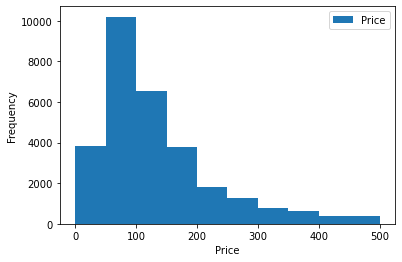

In [15]:
#Histogram of Prices (price_am)
hist_price= dfAirbnbSelected.price_am
plt.hist(hist_price,range=[0,500],label='Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()


In [23]:
#Change the host acceptance rate from string to float (host_acceptance_rate)
dfAirbnbSelected['host_acceptance_rt'] = dfAirbnbSelected['host_acceptance_rate'].astype(str)
dfAirbnbSelected['host_acceptance_rt'] = dfAirbnbSelected['host_acceptance_rt'].str.replace("[ ,% ]", "").astype("float")
#dfAirbnbSelected = dfAirbnbSelected.drop(columns = ['price'])

In [24]:
dfAirbnbSelected['host_acceptance_rt']

0          0.0
1         36.0
2        100.0
3         60.0
4          NaN
         ...  
31531     97.0
31532     95.0
31533      NaN
31534    100.0
31535     76.0
Name: host_acceptance_rt, Length: 31536, dtype: float64

In [25]:
#Vitals of Host acceptance rate (host_acceptance_rt)
print ('Summary Statistics for Host Acceptance Rate')
print('Mean:',dfAirbnbSelected.host_acceptance_rt.mean())
print('Variance:',dfAirbnbSelected.host_acceptance_rt.var())
print('Standard Deviation:',dfAirbnbSelected.host_acceptance_rt.std())
print('Mode:',dfAirbnbSelected.host_acceptance_rt.mode())

Summary Statistics for Host Acceptance Rate
Mean: 84.82787945291375
Variance: 577.5961767737639
Standard Deviation: 24.033230676997295
Mode: 0    100.0
dtype: float64


In [ ]:
#This is kind of a surprise I expected accpetance rates to be higher. Average is 84.82. The common is 100.
#Standar deviation of 24 indicating most acceptance rates are below the 84 mean.

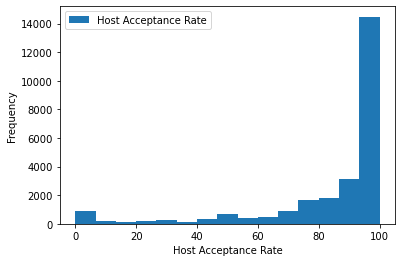

In [27]:
#Histogram of Host acceptance rate
hist_host_accpt_rate= dfAirbnbSelected.host_acceptance_rt
plt.hist(hist_host_accpt_rate, bins=15,label='Host Acceptance Rate')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Frequency')
plt.legend()

In [21]:
#Vitals on how many people are accommodate by the listing (accommodates)
print ('Summary Statistics for Number Accomodations')
print('Mean:',dfAirbnbSelected.accommodates.mean())
print('Variance:',dfAirbnbSelected.accommodates.var())
print('Standard Deviation:',dfAirbnbSelected.accommodates.std())
print('Mode:',dfAirbnbSelected.accommodates.mode())

Summary Statistics for Number Accomodations
Mean: 3.55980466768138
Variance: 6.513626395963844
Standard Deviation: 2.5521807138139425
Mode: 0    2
dtype: int64


In [ ]:
#Accomodation average at 3.5598 with most at around 2. So it would seem couples or individuals without families
#might use Airbnb more than other types.

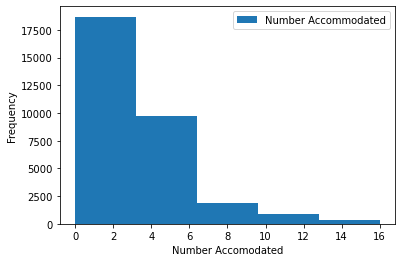

In [12]:
#Histogram on how many people are accommodate by the listing (accommodates)
hist_accommodates= dfAirbnbSelected.accommodates
plt.hist(hist_accommodates, bins=5,label='Number Accommodated')
plt.xlabel('Number Accomodated')
plt.ylabel('Frequency')
plt.legend()

In [23]:
#Vitals number of listing by host (host_listing_count)
print ('Summary Statistics for Number of Listing By Host')
print('Mean:',dfAirbnbSelected.host_listings_count.mean())
print('Variance:',dfAirbnbSelected.host_listings_count.var())
print('Standard Deviation:',dfAirbnbSelected.host_listings_count.std())
print('Mode:',dfAirbnbSelected.host_listings_count.mode())

Summary Statistics for Number of Listing By Host
Mean: 31.955280685061847
Variance: 27332.075452622277
Standard Deviation: 165.32415265962283
Mode: 0    1.0
dtype: float64


In [10]:
print ('Median:',dfAirbnbSelected.host_listings_count.median())

Median: 2.0


In [ ]:
#This was surprising. Average number of host listing is 31.955 Standard deviation says data points are above the 
#mean but a lot. the median is 2 and the mode is 1. Not sure how to explain that.

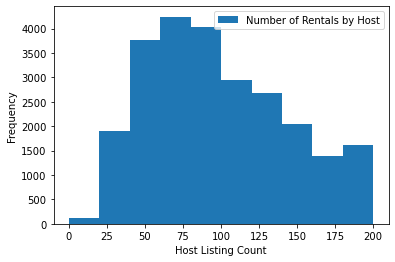

In [26]:
#Histogram of number of listing by host (host_listing count)
hist_host_listing_count= dfAirbnbSelected.host_listings_count
plt.hist(hist_price,range=[0,200],label='Number of Rentals by Host')
plt.xlabel('Host Listing Count')
plt.ylabel('Frequency')
plt.legend()

In [27]:
#Vitals for Minimum Nights Required (minimum_nights)
print ('Summary Statistics for Minimum Nights Required')
print('Mean:',dfAirbnbSelected.minimum_nights.mean())
print('Variance:',dfAirbnbSelected.minimum_nights.var())
print('Standard Deviation:',dfAirbnbSelected.minimum_nights.std())
print('Mode:',dfAirbnbSelected.minimum_nights.mode())

Summary Statistics for Minimum Nights Required
Mean: 18.371321664129884
Variance: 1014.6250776381735
Standard Deviation: 31.853180023950095
Mode: 0    30
dtype: int64


In [ ]:
#If the mean is 18.37 minimum night stays. That seems odd.

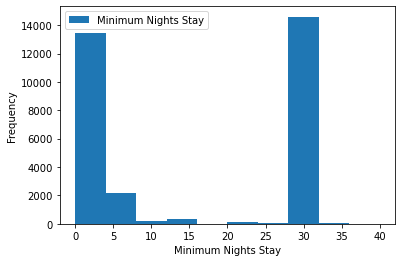

In [15]:
#Histogram on minimum nights stay (minimum_nights)
hist_min_nights_stay= dfAirbnbSelected.minimum_nights
plt.hist(hist_min_nights_stay,range=[0,40],label='Minimum Nights Stay')
plt.xlabel('Minimum Nights Stay')
plt.ylabel('Frequency')
plt.legend()

In [29]:
#Vitals for Availability (availability_30)
print ('Summary Statistics for Availability')
print('Mean:',dfAirbnbSelected.availability_30.mean())
print('Variance:',dfAirbnbSelected.availability_30.var())
print('Standard Deviation:',dfAirbnbSelected.availability_30.std())
print('Mode:',dfAirbnbSelected.availability_30.mode())

Summary Statistics for Availability
Mean: 12.028253424657533
Variance: 148.18664424287593
Standard Deviation: 12.173193674745995
Mode: 0    0
dtype: int64


In [ ]:
#Availability being at 12.02 days. People are renting for 12 days on average.

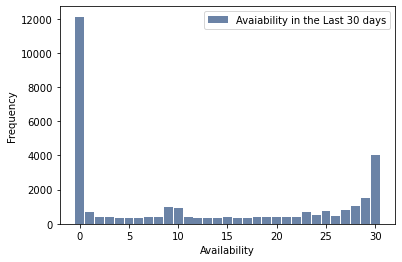

<Figure size 576x432 with 0 Axes>

In [30]:
#Histogram on availability in the last 30 days (availability_30)

hist_availability_30=thinkstats2.Hist(dfAirbnbSelected.availability_30, label='Avaiability in the Last 30 days')
thinkplot.Hist(hist_availability_30)
thinkplot.Show(xlabel='Availability', ylabel='Frequency')

In [31]:
dfAirbnbSelected.number_of_reviews_ltm

0        0
1        2
2        4
3        2
4        0
        ..
31531    0
31532    0
31533    0
31534    0
31535    0
Name: number_of_reviews_ltm, Length: 31536, dtype: int64

In [12]:
#Vital of Number of Reviews (number_of_reviews_ltm)
print ('Summary Statistics for Number of Reviews (LTM)')
print('Mean:',dfAirbnbSelected.number_of_reviews_ltm.mean())
print('Variance:',dfAirbnbSelected.number_of_reviews_ltm.var())
print('Standard Deviation:',dfAirbnbSelected.number_of_reviews_ltm.std())
print('Mode:',dfAirbnbSelected.number_of_reviews_ltm.mode())
print('Median:',dfAirbnbSelected.number_of_reviews_ltm.median())

Summary Statistics for Number of Reviews (LTM)
Mean: 8.838723997970574
Variance: 239.5647930950657
Standard Deviation: 15.47788076886063
Mode: 0    0
dtype: int64
Median: 2.0


In [ ]:
#The number of reviews is about 8 per host. With clusting around 15.

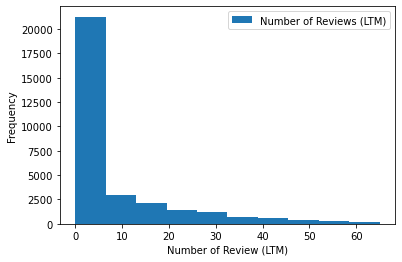

In [53]:
#Histogram of Number of Reviews (number_of_reviews_ltm)
hist_number_of_reviews_ltm= dfAirbnbSelected.number_of_reviews_ltm
plt.hist(hist_number_of_reviews_ltm, range=[0,65],label='Number of Reviews (LTM)')
plt.xlabel('Number of Review (LTM)')
plt.ylabel('Frequency')
plt.legend()

In [8]:
#Vital of types of hosts (host_is_superhost)
print ('host_is_superhost')
print('Mean:',dfAirbnbSelected.host_is_superhost.mean())
print('Variance:',dfAirbnbSelected.host_is_superhost.var())
print('Standard Deviation:',dfAirbnbSelected.host_is_superhost.std())
print('Mode:',dfAirbnbSelected.host_is_superhost.mode())


host_is_superhost
Mean: 0.36555661274976214
Variance: 0.23193233155024479
Standard Deviation: 0.48159353354280493
Mode: 0    0.0
dtype: float64


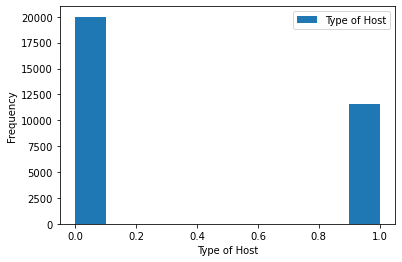

In [28]:
#Histogram is host superhost
hist_host_is_super= dfAirbnbSelected.host_is_superhost
plt.hist(hist_host_is_super,label='Type of Host')
plt.xlabel('Type of Host')
plt.ylabel('Frequency')
plt.legend()

neighbourhood_cleansed


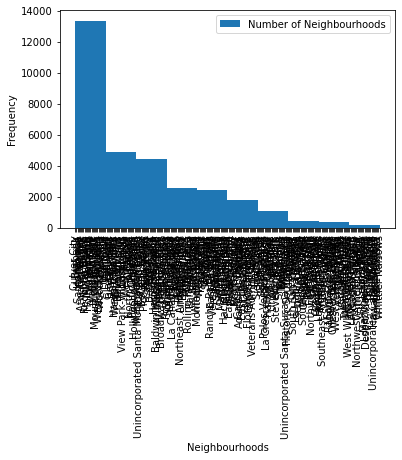

In [31]:
#Histogram of Locations cleaned by Airbnb
print ('neighbourhood_cleansed')

hist_neighbourhood_cleansed= dfAirbnbSelected.neighbourhood_cleansed
plt.hist(hist_neighbourhood_cleansed,label='Number of Neighbourhoods')
plt.xlabel('Neighbourhoods')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.legend()

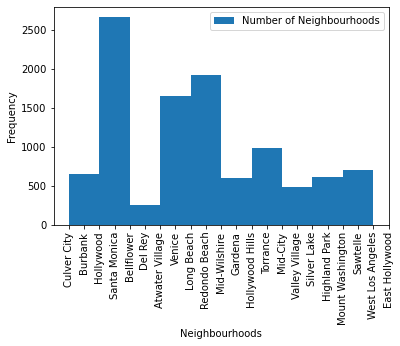

In [19]:
hist_neighbourhood_cleansed= dfAirbnbSelected.neighbourhood_cleansed
plt.hist(hist_neighbourhood_cleansed,range=[0,20],label='Number of Neighbourhoods')
plt.xlabel('Neighbourhoods')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.legend()

In [ ]:
#Santa Monica appears to be popular rental area Compared to other places.

Property Type


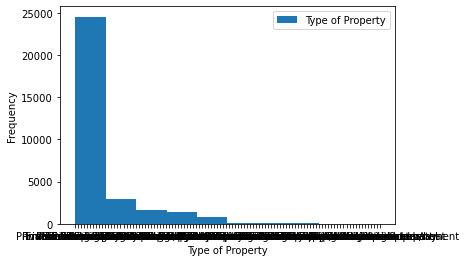

In [35]:
print('Property Type')
hist_property_type= dfAirbnbSelected.property_type
plt.hist(hist_property_type,bins=10,label='Type of Property')
plt.xlabel('Type of Property')
plt.ylabel('Frequency')
plt.legend()

Property Type


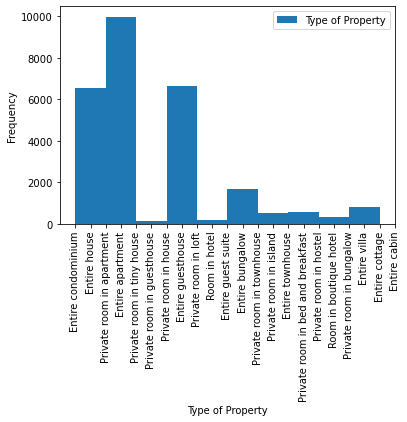

In [24]:
print('Property Type')
hist_property_type= dfAirbnbSelected.property_type
plt.hist(hist_property_type,range=[0,20],label='Type of Property')
plt.xlabel('Type of Property')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.legend()

In [ ]:
#This is surprising. I expect lessor property types. Apartments seems to be pretty high and guesthouses. 
#The guesthouse has to be a regional thing.

In [10]:
#Probablity Mass Function

#Make dataframe with review rate super host and host
dfsuperhosts = dfAirbnbSelected[dfAirbnbSelected.host_is_superhost == 1]
dfregularhosts = dfAirbnbSelected[dfAirbnbSelected.host_is_superhost != 1]


In [33]:
#PMF
superhosts_pmf = thinkstats2.Pmf(dfsuperhosts.number_of_reviews_ltm, label='superhosts')
regularhosts_pmf = thinkstats2.Pmf(dfregularhosts.number_of_reviews_ltm, label='regularhosts')

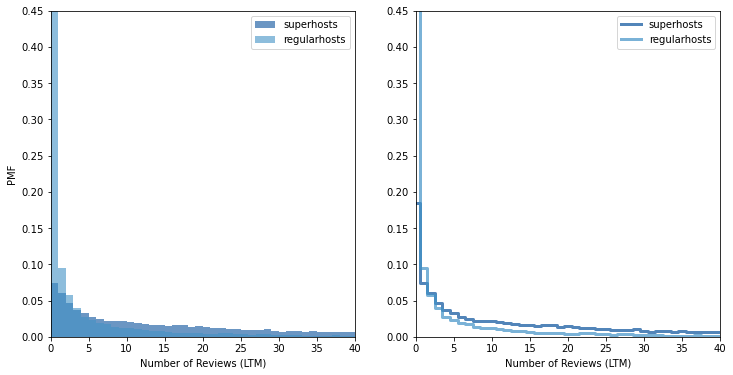

<Figure size 576x432 with 0 Axes>

In [39]:
#PMF Bar graph and step function side by side.
width=1
axis = [0, 40, 0, 0.45]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(superhosts_pmf, align='right', width=width)
thinkplot.Hist(regularhosts_pmf, align='left', width=width)
thinkplot.Config(xlabel='Number of Reviews (LTM)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([superhosts_pmf, regularhosts_pmf])
thinkplot.Show(xlabel='Number of Reviews (LTM)',axis=axis)

In [ ]:
#No really different in being a Super Host compared to Regular Host.

In [31]:
superhosts_pmf2 = thinkstats2.Pmf(dfsuperhosts.price_am, label='superhosts')
regularhosts_pmf2 = thinkstats2.Pmf(dfregularhosts.price_am, label='regularhosts')

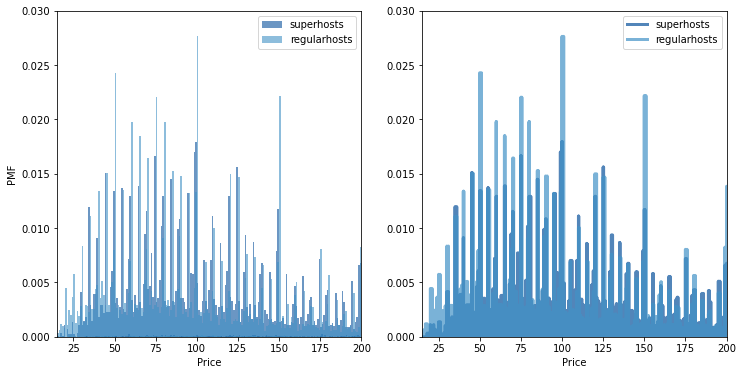

<Figure size 576x432 with 0 Axes>

In [35]:
width=1
axis = [15, 200, 0, 0.03]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(superhosts_pmf2, align='right', width=width)
thinkplot.Hist(regularhosts_pmf2, align='left', width=width)
thinkplot.Config(xlabel='Price', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([superhosts_pmf2, regularhosts_pmf2])
thinkplot.Show(xlabel='Price',axis=axis)

In [59]:
#CDF of One variable

superhosts_cdf = thinkstats2.Cdf(dfsuperhosts.number_of_reviews_ltm, label='superhosts')

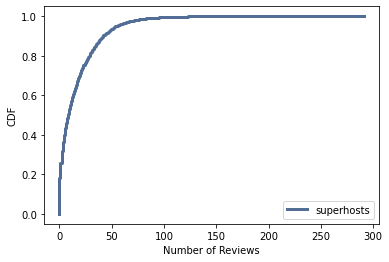

<Figure size 576x432 with 0 Axes>

In [41]:
#Plot CDF
thinkplot.Cdf(superhosts_cdf)
thinkplot.Show(xlabel='Number of Reviews', ylabel='CDF')

In [60]:
#CDF of regularhost
regularhosts_cdf = thinkstats2.Cdf(dfregularhosts.number_of_reviews_ltm, label='regularhosts')


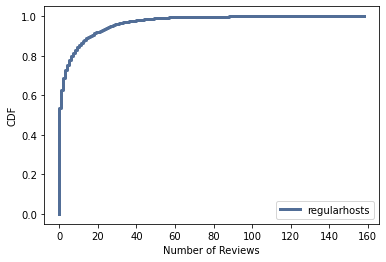

<Figure size 576x432 with 0 Axes>

In [41]:
#Plot CDF Regular host and number of reviews
thinkplot.Cdf(regularhosts_cdf)
thinkplot.Show(xlabel='Number of Reviews', ylabel='CDF')

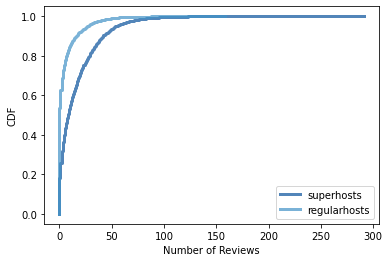

<Figure size 576x432 with 0 Axes>

In [61]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([superhosts_cdf, regularhosts_cdf])
thinkplot.Show(xlabel='Number of Reviews', ylabel='CDF')

In [12]:
superhosts_price_cdf = thinkstats2.Cdf(dfsuperhosts.price_am, label='superhosts')

In [11]:
dfsuperhosts.price_am

2         74.00
5         55.00
6         70.00
7        130.00
8         79.00
          ...  
31511    208.00
31523    143.00
31531    248.00
31532    160.14
31535    894.00
Name: price_am, Length: 11526, dtype: float64

In [13]:
superhosts_price_cdf

Cdf([   0.   12.   13. ... 6250. 9995. 9999.], [2.60281104e-04 3.47041471e-04 4.33801839e-04 ... 9.99826479e-01
 9.99913240e-01 1.00000000e+00], 'superhosts')

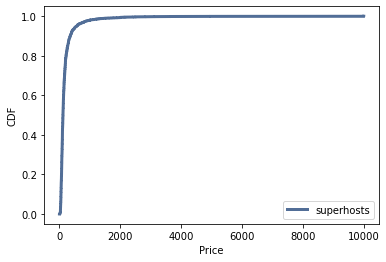

<Figure size 576x432 with 0 Axes>

In [14]:
#Plot CDF of Price and Super Host
thinkplot.Cdf(superhosts_price_cdf)
thinkplot.Show(xlabel='Price', ylabel='CDF')

In [58]:
regularhosts_price_cdf = thinkstats2.Cdf(dfregularhosts.price_am, label='regularhosts')

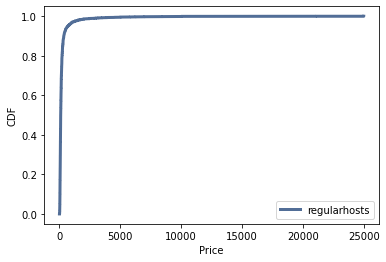

<Figure size 576x432 with 0 Axes>

In [45]:
#Plot CDF of Price and Regular host
thinkplot.Cdf(regularhosts_price_cdf)
thinkplot.Show(xlabel='Price', ylabel='CDF')

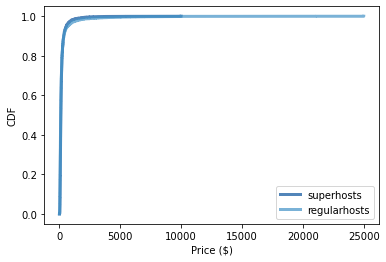

<Figure size 576x432 with 0 Axes>

In [54]:
#Compare both Super Host to Regular Host using CDFs and price
thinkplot.PrePlot(2)
thinkplot.Cdfs([superhosts_price_cdf, regularhosts_price_cdf])
thinkplot.Show(xlabel='Price ($)', ylabel='CDF')

In [ ]:
superhost_price_cdf

In [46]:
price_am = dfAirbnbSelected.price_am
cdf = thinkstats2.Cdf(price_am, label='Price ($)')

In [47]:
sample = np.random.choice(price_am, 100, replace=True)
ranks = [cdf.PercentileRank(x) for x in sample]

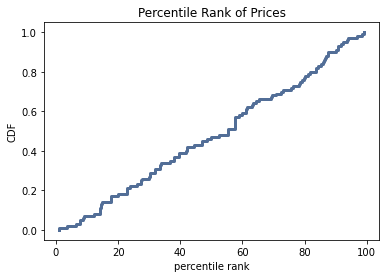

<Figure size 576x432 with 0 Axes>

In [49]:
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel='percentile rank', ylabel='CDF', title='Percentile Rank of Prices')

In [20]:
#Plot Analytical distribution of Price
priceairbnb=dfAirbnbSelected.price_am.dropna()

In [48]:
max(dfAirbnbSelected.price_am.dropna())
#Mean: 222.68233637747355
#Variance: 368210.0867693615
#Standard Deviation: 606.803169709389
#Mode: 0    100.0


24999.0

In [21]:
priceairbnb

0        115.00
1        176.00
2         74.00
3        155.00
4         50.00
          ...  
31531    248.00
31532    160.14
31533     60.00
31534    149.00
31535    894.00
Name: price_am, Length: 31536, dtype: float64

Mean, Var 177.30854397204428 52277.81109959485
Sigma 228.6434147304375


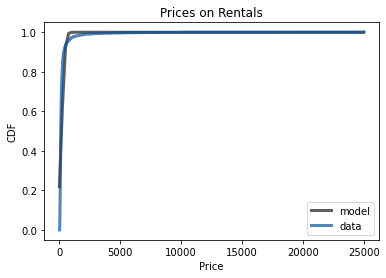

In [24]:
#plot Analytical distribution of Price

mu, var = thinkstats2.TrimmedMeanVar(priceairbnb, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=25000)

thinkplot.Plot(xs, ps, label='model', color='0.1')

# plot the data
cdf = thinkstats2.Cdf(priceairbnb, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Prices on Rentals',
                 xlabel='Price',
                 ylabel='CDF')

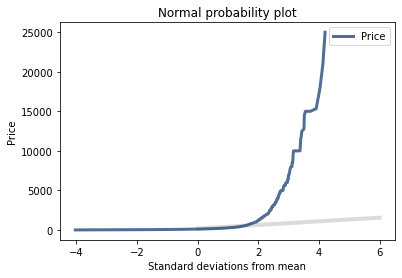

In [28]:
mean, var = thinkstats2.TrimmedMeanVar(priceairbnb, p=0.01)
std = np.sqrt(var)

xs = [0, 6]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(priceairbnb)
thinkplot.Plot(xs, ys, label='Price')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Price')

In [41]:
#Look at lower prices
#If removing rental prices over 1000 this would all a look at the majority of rentals at mean on price is $222
priceairbnb2=dfAirbnbSelected.price_am <= 1000



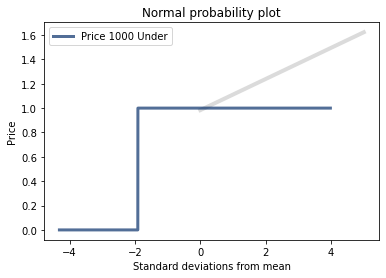

In [44]:
mean, var = thinkstats2.TrimmedMeanVar(priceairbnb2, p=0.01)
std = np.sqrt(var)

xs = [0, 5]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(priceairbnb2)
thinkplot.Plot(xs, ys, label='Price 1000 Under')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Price')

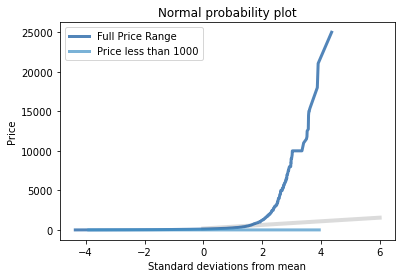

In [38]:
mean, var = thinkstats2.TrimmedMeanVar(priceairbnb, p=0.01)
std = np.sqrt(var)

xs = [0, 6]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

thinkplot.PrePlot(2) 
xs, ys = thinkstats2.NormalProbability(priceairbnb)
thinkplot.Plot(xs, ys, label='Full Price Range')

xs, ys = thinkstats2.NormalProbability(priceairbnb2)
thinkplot.Plot(xs, ys, label='Price less than 1000')
thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Price')

In [ ]:
#Prices still climb at the standard deviation from the mean. But prices under 1000 dollars are more in line with
#the model (gray line). The higher prices 

In [44]:
#Create to scatter plots comapring two variables

In [45]:
#Just checking number rows
len(dfAirbnbSelected)

31536

In [62]:
def SampleRows(dfAirbnbSelected, nrows, replace=False):
    indices = np.random.choice(dfAirbnbSelected.index, nrows, replace=replace)
    sampleAirbnb = dfAirbnbSelected.loc[indices]
    return sampleAirbnb

In [70]:
sampleAirbnb = SampleRows(dfAirbnbSelected, 5000)
price, review_ltm=sampleAirbnb.price_am, sampleAirbnb.number_of_reviews_ltm

In [71]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [73]:
price = Jitter(price)
review_ltm = Jitter(review_ltm)

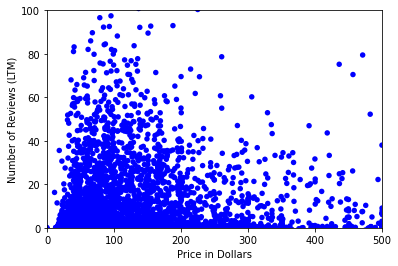

In [56]:
#Scatter plot 1 comparing two variables Price and Number of Review (LTM)
thinkplot.Scatter(price, review_ltm, alpha=0.1, s=10)
thinkplot.Config(xlabel='Price in Dollars',
                 ylabel='Number of Reviews (LTM)',
                 axis=[0, 500, 0, 100],
                 legend=False)

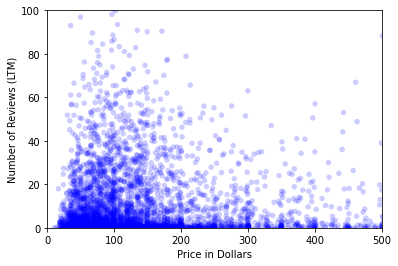

In [76]:
#Scatter plot 1 comparing two variables Price and Number of Review (LTM)
thinkplot.Scatter(price, review_ltm,alpha=0.2, s=30)
thinkplot.Config(xlabel='Price in Dollars',
                 ylabel='Number of Reviews (LTM)',
                 axis=[0, 500, 0, 100],
                 legend=False)

In [14]:
#Correlation, covariance, Non-Linear Relationship

#Covariance
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

import pandas as pd

#Spearman Correlation
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

#Pearson's Correlation 
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [22]:
#Correlation of full volume
np.corrcoef(dfAirbnbSelected.price_am, dfAirbnbSelected.number_of_reviews_ltm)

array([[ 1.        , -0.06051343],
       [-0.06051343,  1.        ]])

In [23]:
#Covariance of full volume
Cov(dfAirbnbSelected.price_am, dfAirbnbSelected.number_of_reviews_ltm)

-568.3257384317659

In [24]:
#Spearman Corr of full volume
SpearmanCorr(dfAirbnbSelected.price_am, dfAirbnbSelected.number_of_reviews_ltm)

-0.019010774108232136

In [64]:
#Scatter plot 2 comparing two variables 
def SampleRows2(dfAirbnbSelected, nrows, replace=False):
    indices = np.random.choice(dfAirbnbSelected.index, nrows, replace=replace)
    sampleAirbnb2 = dfAirbnbSelected.loc[indices]
    return sampleAirbnb2

In [65]:
sampleAirbnb2 = SampleRows2(dfAirbnbSelected, 5000)
accommodates, availability_30=sampleAirbnb.accommodates, sampleAirbnb.availability_30

In [68]:
accommodates = Jitter(accommodates)
availability_30 = Jitter(availability_30)

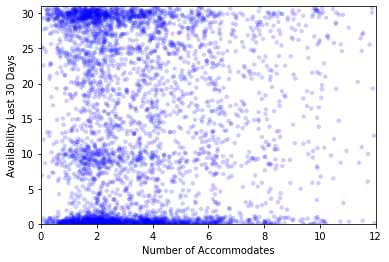

In [76]:
thinkplot.Scatter(accommodates, availability_30, alpha=0.2,s=20 )
thinkplot.Config(xlabel='Number of Accommodates',
                 ylabel='Availability Last 30 Days',
                 axis=[0, 12, 0, 31],
                 legend=False)

In [27]:
#Correlation, covariance, Non-Linear Relationship
#Correlation of full volume
print('Correlation: ',np.corrcoef(dfAirbnbSelected.accommodates, dfAirbnbSelected.availability_30))


Correlation:  [[1.         0.03854838]
 [0.03854838 1.        ]]


In [28]:
#Covariance of full volume
print('Covariance: ',Cov(dfAirbnbSelected.accommodates, dfAirbnbSelected.availability_30))

Covariance:  1.197590501049465


In [29]:
#Spearman Corr of full volume
print('Spearman Correlation: ', SpearmanCorr(dfAirbnbSelected.accommodates, dfAirbnbSelected.availability_30))


Spearman Correlation:  0.002101257473645003


In [23]:
import seaborn as sns


In [13]:
#Scatter plot of Price and location
sampleAirbnb = SampleRows(dfAirbnbSelected, 5000)
price_am, neighbourhood_cleansed=sampleAirbnb.price_am, sampleAirbnb.neighbourhood_cleansed


(0.0, 700.0)

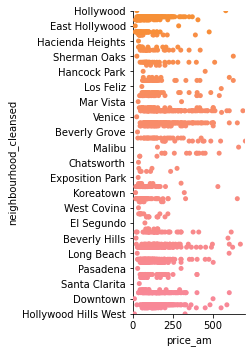

In [30]:
sns.catplot(x='price_am', y='neighbourhood_cleansed', kind="swarm", data=sampleAirbnb)
plt.ylim(0, 20)
plt.xlim(0,700)

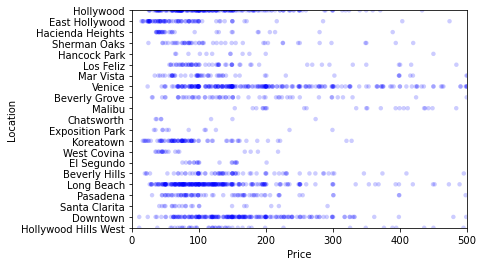

In [21]:
thinkplot.Scatter(price_am, neighbourhood_cleansed, alpha=0.2,s=20 )
thinkplot.Config(xlabel='Price',
                 ylabel='Location',
                 axis=[0, 500, 0, 20],
                 legend=False)

In [63]:
sampleAirbnb = SampleRows(dfAirbnbSelected, 5000)
price_am, host_is_superhost=sampleAirbnb.price_am, sampleAirbnb.host_is_superhost


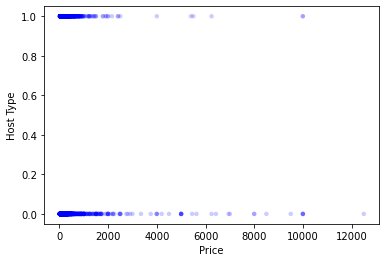

In [64]:
thinkplot.Scatter(price_am, host_is_superhost, alpha=0.2,s=20 )
thinkplot.Config(xlabel='Price',
                 ylabel='Host Type',
                 legend=True)

In [65]:
#Hypothesis Test -Permutation test
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data


In [67]:
#Perform the Permutation test

data = dfsuperhosts.number_of_reviews_ltm.values, dfregularhosts.number_of_reviews_ltm.values

In [68]:
#Run Permutation

ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [ ]:
#With a pvalue of 0 it would indicate there is no relationship between the number of review and host is a 
#super host or regular host

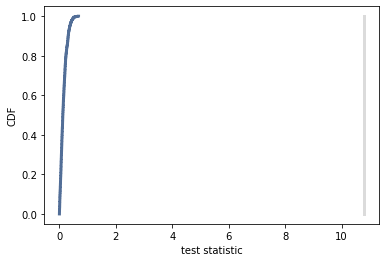

In [35]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [74]:
#Run a test between host and price
data = dfsuperhosts.price_am.values, dfregularhosts.price_am.values

In [75]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

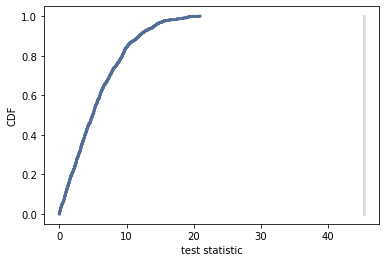

In [76]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [66]:
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat

In [77]:
#Difference is one sided
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

1.0

In [78]:
class DiffStdPermute(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat

In [79]:
#Testing the difference in standard deviation
ht = DiffStdPermute(data)
pvalue = ht.PValue()
pvalue

1.0

In [80]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [81]:
cleaned = dfAirbnbSelected.dropna(subset=['price_am', 'host_is_superhost'])
data = cleaned.price_am.values, cleaned.host_is_superhost.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [49]:
#Regression analysis
import statsmodels.formula.api as smf



In [58]:
#How is being a super host and the number of reviews impacts the prices?

formula = 'price_am ~ number_of_reviews + host_is_superhost'
results = smf.ols(formula, data=dfAirbnbSelected).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_am   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     78.42
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           1.07e-34
Time:                        20:37:38   Log-Likelihood:            -2.4671e+05
No. Observations:               31530   AIC:                         4.934e+05
Df Residuals:                   31527   BIC:                         4.935e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           251.5333      4.430     56.786      0.000     242.851     260.215
number_of_reviews    -0.5837      0.054    -10.764      0.000      -0.690      -0.477
host_is_superhost   -22.4859      7.390     -3.043      0.002     -36.971      -8.001
==============================================================================
Omnibus:                    58919.971   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        127680971.003
Skew:                          14.166   Prob(JB):                         0.00
Kurtosis:                     313.460   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
inter = results.params['Intercept']
slope = results.params['number_of_reviews']
inter, slope

(251.53329197381086, -0.5837329069350886)

In [62]:
slope_pvalue = results.pvalues['number_of_reviews']
slope_pvalue

5.688580624221516e-27

In [63]:
results.rsquared

0.004949874635915008

In [25]:
#Are prices impacted by being a super host having good review scores and review score values.
formula = 'price_am ~ host_is_superhost + review_scores_rating + review_scores_value'
results = smf.ols(formula, data=dfAirbnbSelected).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_am   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     51.77
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           2.40e-33
Time:                        21:22:54   Log-Likelihood:            -1.6955e+05
No. Observations:               23869   AIC:                         3.391e+05
Df Residuals:                   23865   BIC:                         3.391e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                106.1794     21.112      5.029      0.000      64.799     147.560
host_is_superhost[T.t]     1.5575      3.995      0.390      0.697      -6.273       9.388
review_scores_rating       4.4738      0.366     12.209      0.000       3.756       5.192
review_scores_value      -37.6201      3.422    -10.995      0.000     -44.327     -30.913
==============================================================================
Omnibus:                    39792.047   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50824017.150
Skew:                          11.152   Prob(JB):                         0.00
Kurtosis:                     227.957   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#Convert string for host since and last scraped to get Host experience. 
#Aka how long has the host been a Airbnb host member

dfAirbnbSelected.host_since = pd.to_datetime(dfAirbnbSelected.host_since)
dfAirbnbSelected.last_scraped = pd.to_datetime(dfAirbnbSelected.last_scraped)


In [46]:
dfAirbnbSelected[['host_since','last_scraped']]
dfAirbnbSelected['host_experience_days'] = (dfAirbnbSelected['last_scraped'] - dfAirbnbSelected['host_since']).dt.days


In [47]:
dfAirbnbSelected[['host_experience_days','host_since','last_scraped']]


,host_experience_days,host_since,last_scraped
0,4459.0,2008-06-27,2020-09-11
1,4446.0,2008-07-11,2020-09-12
2,4377.0,2008-09-16,2020-09-10
3,4376.0,2008-09-17,2020-09-10
4,4368.0,2008-09-25,2020-09-10
...,...,...,...
31531,779.0,2018-07-25,2020-09-11
31532,296.0,2019-11-20,2020-09-11
31533,59.0,2020-07-14,2020-09-11
31534,505.0,2019-04-25,2020-09-11


In [51]:
#Does host experince impact price?
formula = 'price_am ~ host_experience_days'
results = smf.ols(formula, data=dfAirbnbSelected).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_am   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.551
Date:                Fri, 20 Nov 2020   Prob (F-statistic):              0.213
Time:                        20:14:37   Log-Likelihood:            -2.4679e+05
No. Observations:               31530   AIC:                         4.936e+05
Df Residuals:                   31528   BIC:                         4.936e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              230.7114      7.289     31.653      0.000     216.425     244.998
host_experience_days    -0.0048      0.004     -1.245      0.213      -0.012       0.003
==============================================================================
Omnibus:                    58940.762   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        127227807.258
Skew:                          14.180   Prob(JB):                         0.00
Kurtosis:                     312.902   Cond. No.                     4.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
inter = results.params['Intercept']
slope = results.params['host_experience_days']
inter, slope

(230.71136028755896, -0.0047575313383367845)

In [56]:
slope_pvalue = results.pvalues['host_experience_days']
slope_pvalue

0.21301352847260646

In [57]:
results.rsquared

4.918842128232015e-05

In [84]:
#Price compared to Location
formula = 'price_am ~ neighbourhood_cleansed'
results = smf.ols(formula, data=dfAirbnbSelected).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_am   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     23.73
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:37:01   Log-Likelihood:            -2.4398e+05
No. Observations:               31536   AIC:                         4.885e+05
Df Residuals:                   31273   BIC:                         4.907e+05
Df Model:                         262                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         139.0000    321.311      0.433      0.665    -490.781     768.781
neighbourhood_cleansed[T.Adams-Normandie]                         -55.1591    334.798     -0.165      0.869    -711.376     601.058
neighbourhood_cleansed[T.Agoura Hills]                             86.0263    333.753      0.258      0.797    -568.143     740.195
neighbourhood_cleansed[T.Agua Dulce]                               81.3471    354.067      0.230      0.818    -612.638     775.332
neighbourhood_cleansed[T.Alhambra]                                -38.8273    323.097     -0.120      0.904    -672.111     594.456
neighbourhood_cleansed[T.Alondra Park]                            -16.6429    354.067     -0.047      0.963    -710.628     677.342
neighbourhood_cleansed[T.Altadena]                                 39.8513    323.436      0.123      0.902    -594.096     673.799
neighbourhood_cleansed[T.Angeles Crest]                            54.6667    454.402      0.120      0.904    -835.979     945.312
neighbourhood_cleansed[T.Arcadia]                                 -15.2731    323.798     -0.047      0.962    -649.930     619.384
neighbourhood_cleansed[T.Arleta]                                  -84.0000    393.523     -0.213      0.831    -855.322     687.322
neighbourhood_cleansed[T.Arlington Heights]                       -70.0247    325.439     -0.215      0.830    -707.898     567.849
neighbourhood_cleansed[T.Artesia]                                 -39.3636    362.487     -0.109      0.914    -749.853     671.126
neighbourhood_cleansed[T.Athens]                                  -44.6000    406.429     -0.110      0.913    -841.218     752.018
neighbourhood_cleansed[T.Atwater Village]                           6.3714    326.932      0.019      0.984    -634.427     647.170
neighbourhood_cleansed[T.Avalon]                                  365.2659    324.466      1.126      0.260    -270.700    1001.232
neighbourhood_cleansed[T.Avocado Heights]                         -23.3636    362.487     -0.064      0.949    -733.853     687.126
neighbourhood_cleansed[T.Azusa]                                   -30.1083    328.755     -0.092      0.927    -674.481     614.265
neighbourhood_cleansed[T.Baldwin Hills/Crenshaw]                  -34.8197    329.117     -0.106      0.916    -679.902     610.262
neighbourhood_cleansed[T.Baldwin Park]                            -56.3143    334.798     -0.168      0.866    -712.532     599.903
neighbourhood_cleansed[T.Bel-Air]                                2470.4658    330.809      7.468      0.000    1822.066    3118.865
neighbourhood_cleansed[T.Bell]                 

In [ ]:
#Price is dependent on location as suspected.
#

In [95]:
#Price compared to accomodation.
formula = 'price_am ~ accommodates'
results = smf.ols(formula, data=dfAirbnbSelected).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_am   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     6114.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:58:50   Log-Likelihood:            -2.4404e+05
No. Observations:               31536   AIC:                         4.881e+05
Df Residuals:                   31534   BIC:                         4.881e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -118.3982      5.367    -22.059      0.000    -128.918    -107.878
accommodates    95.8144      1.225     78.193      0.000      93.413      98.216
==============================================================================
Omnibus:                    60627.827   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        171349392.334
Skew:                          14.993   Prob(JB):                         0.00
Kurtosis:                     362.866   Cond. No.                         7.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""